In [2]:
import glob
import pandas as pd
pd.set_option('max_colwidth', 60)
import folium
from folium.plugins import HeatMap
import numpy as np

In [4]:
import os
 
dirpath = os.getcwd()
print("current directory is : " + dirpath)
foldername = os.path.basename(dirpath)
print("Directory name is : " + foldername)

current directory is : C:\Users\Thomas.Zoellinger\Documents\Jupyter Notebooks\Git\polizeiberichte_scraper\notebooks
Directory name is : notebooks


In [35]:
streets_mapping = pd.read_csv(r"C:\Users\Thomas.Zoellinger\Documents\Jupyter Notebooks\Git\polizeiberichte_scraper\resources\streets_mapping_full.csv", sep=";",header="infer", encoding ="UTF-8")

In [36]:
streets_mapping["Address"].str.count("Straße").sum()

679

In [37]:
news = pd.concat([pd.read_csv(f,sep=";",header="infer", encoding ="UTF-8") for f in glob.glob(r'C:\Users\Thomas.Zoellinger\Documents\Jupyter Notebooks\Git\polizeiberichte_scraper\resources\ffm_news*.csv')])

In [38]:
adress_list = list(streets_mapping["Address"])
counts = []
for adress in adress_list:
    counts.append(news["News"].str.count(adress).sum())
series_counts = pd.Series(counts)
streets_mapping["Counts"] = series_counts

In [39]:
brand_number = streets_mapping.loc[streets_mapping["Address"]=="Brand"].index[0]
streets_mapping= streets_mapping.drop(brand_number)
streets_mapping.sort_values(by="Counts", ascending=False)

,Address,AddressFM,location,point,Lat,Long,Counts
2061,Mainzer Landstraße,Frankfurt am Main Mainzer Landstraße,"Mainzer Landstraße, Griesheim, Frankfurt, Regierungsbezi...","50.100146, 8.6093344, 0.0",50.100146,8.609334,1675.0
1297,Hanauer Landstraße,Frankfurt am Main Hanauer Landstraße,"Hanauer Landstraße, Ostend, Frankfurt, Regierungsbezirk ...","50.1114506, 8.7051296, 0.0",50.111451,8.705130,1641.0
1506,Hugo-Eckener-Ring,Frankfurt am Main Hugo-Eckener-Ring,"Hugo-Eckener-Ring, Flughafen, Frankfurt, Regierungsbezir...","50.0531543, 8.5787244, 0.0",50.053154,8.578724,1078.0
3159,Zeil,Frankfurt am Main Zeil,"Zeil, Innenstadt, Frankfurt, Regierungsbezirk Darmstadt,...","50.11430335, 8.68170396846261, 0.0",50.114303,8.681704,888.0
486,Babenhäuser Landstraße,Frankfurt am Main Babenhäuser Landstraße,"Babenhäuser Landstraße, Lauterborn, Offenbach am Main, R...","50.0695671, 8.7324133, 0.0",50.069567,8.732413,747.0
2025,Ludwig-Landmann-Straße,Frankfurt am Main Ludwig-Landmann-Straße,"Ludwig-Landmann-Straße, Praunheim, Frankfurt, Regierungs...","50.1397308, 8.6120283, 0.0",50.139731,8.612028,706.0
1132,Gerbermühlstraße,Frankfurt am Main Gerbermühlstraße,"Gerbermühlstraße, Oberrad, Offenbach am Main, Regierungs...","50.1062852, 8.7263308, 0.0",50.106285,8.726331,678.0
2086,Markt,Frankfurt am Main Markt,"Frankfurt, Regierungsbezirk Darmstadt, Hessen, 60311, De...","50.1106444, 8.6820917, 0.0",50.110644,8.682092,604.0
3179,Züricher Straße,Frankfurt am Main Züricher Straße,"Züricher Straße, Nieder-Eschbach, Frankfurt, Regierungsb...","50.1965813, 8.652487, 0.0",50.196581,8.652487,581.0
2176,Mörfelder Landstraße,Frankfurt am Main Mörfelder Landstraße,"Mörfelder Landstraße, Sachsenhausen Süd, Frankfurt, Regi...","50.0966705, 8.6840548, 0.0",50.096671,8.684055,567.0


In [40]:
streets_mapping

,Address,AddressFM,location,point,Lat,Long,Counts
0,Abflugring,Frankfurt am Main Abflugring,"Abflugring, Flughafen, Frankfurt, Regierungsbezirk Darms...","50.0521337, 8.5762553, 0.0",50.052134,8.576255,4.0
1,Abtsgäßchen,Frankfurt am Main Abtsgäßchen,"Abtsgäßchen, Sachsenhausen, Sachsenhausen Nord, Frankfur...","50.1044626, 8.6888205, 0.0",50.104463,8.688821,1.0
2,Achenbachstraße,Frankfurt am Main Achenbachstraße,"Achenbachstraße, Sachsenhausen, Sachsenhausen Nord, Fran...","50.0974901, 8.676911, 0.0",50.097490,8.676911,0.0
3,Ackermannstraße,Frankfurt am Main Ackermannstraße,"Ackermannstraße, Friedrich-Ebert-Siedlung, Europaviertel...","50.0965315, 8.62789, 0.0",50.096531,8.627890,46.0
4,Adalbert-Stifter-Straße,Frankfurt am Main Adalbert-Stifter-Straße,"Adalbert-Stifter-Straße, Dornbusch, Frankfurt, Regierung...","50.1450315, 8.663405, 0.0",50.145032,8.663405,2.0
5,Adalbertstraße,Frankfurt am Main Adalbertstraße,"Adalbertstraße, Bockenheim, Frankfurt, Regierungsbezirk ...","50.1191548, 8.6434582, 0.0",50.119155,8.643458,41.0
6,Adam-Heinstadt-Straße,Frankfurt am Main Adam-Heinstadt-Straße,"Adam-Heinstadt-Straße, Nieder-Eschbach, Frankfurt, Regie...","50.2002416, 8.6623236, 0.0",50.200242,8.662324,0.0
7,Adam-Leis-Straße,Frankfurt am Main Adam-Leis-Straße,"Adam-Leis-Straße, Heddernheim, Frankfurt, Regierungsbezi...","50.1650839, 8.6391034, 0.0",50.165084,8.639103,0.0
8,Adam-Opel-Straße,Frankfurt am Main Adam-Opel-Straße,"Adam-Opel-Straße, Fechenheim, Frankfurt, Regierungsbezir...","50.1241403, 8.7564444, 0.0",50.124140,8.756444,17.0
9,Adam-Riese-Platz,Frankfurt am Main Adam-Riese-Platz,"Adam-Riese-Platz, Gallus, Frankfurt, Regierungsbezirk Da...","50.10648215, 8.65585925476031, 0.0",50.106482,8.655859,1.0


In [34]:
hmap = folium.Map(location=[50.110674, 8.681654], zoom_start=11.5,)
hm_wide = HeatMap(list(zip(streets_mapping["Lat"].values, streets_mapping["Long"].values, streets_mapping["Counts"].values)),
                  min_opacity=0.15,
                  max_val=float(streets_mapping["Counts"].max()),
                  radius=25,
                  blur=5
                  )
hmap.add_child(hm_wide)

In [161]:
streets_mapping2 = pd.read_csv(r"C:\Users\Thomas.Zoellinger\Documents\Jupyter Notebooks\Git\polizeiberichte_scraper\resources\streets_mapping_full.csv", sep=";",header="infer", encoding ="UTF-8")
streets_mapping2["Address"] = streets_mapping2["Address"].str.lower()

In [5]:
news2 = pd.read_excel(r"C:\Users\Thomas.Zoellinger\Downloads\MYDF2.xlsx", sep=";",header="infer", encoding ="UTF-8", usecols = ["Hauptartikel","Topic_LSI_Update 12","Sentiment"])

In [118]:
news2["Hauptartikel"] = news2["Hauptartikel"].str.lower()

In [141]:
street_list = streets_mapping["Address"].tolist()

In [119]:
street_list =  [x.lower() for x in street_list]

In [120]:
for streetname in street_list:
    news2.loc[:, streetname] = news2["Hauptartikel"].apply(lambda x: streetname in x)

In [128]:
Senti_list =[]
Count_List =[]
for streetname in street_list:
    Senti_list.append(np.mean(news2[news2[streetname]].Sentiment.tolist()))
    Count_List.append(np.count_nonzero(news2[news2[streetname]].Sentiment.tolist()))


In [162]:
streets_mapping2['Sentiment'] = pd.Series(Senti_list)
streets_mapping2['Street'] = pd.Series(street_list)
streets_mapping2['Count'] = pd.Series(Count_List)

In [163]:
df = pd.DataFrame(list(zip(street_list, Senti_list, Count_List)), 
               columns =['Street', 'Sentiment','Count']) 

In [169]:
df = df[df["Count"]>40]
df.sort_values(by=['Sentiment'])

,Street,Sentiment,Count
1093,Gallusanlage,-0.535365,42
2707,Schwanheimer Ufer,-0.491454,68
3010,Waldschulstraße,-0.463705,88
1334,Heddernheimer Landstraße,-0.463444,47
2496,Rhönstraße,-0.458984,42
2877,Taunusstraße,-0.445920,196
3177,Zuckschwerdtstraße,-0.442937,41
3093,Wiesenstraße,-0.442622,48
1099,Gartenstraße,-0.440332,77
3109,Wilhelm-Leuschner-Straße,-0.437806,45


In [9]:
news2.head()

,Hauptartikel,Topic_LSI_Update 12,Sentiment
0,Frankfurt - Nordend: Wohnungsbrand Im 2. Obergesch...,3,-0.566667
1,"Hofheim: Räuberische Erpressung Am 07.05.2000, gegen...",10,-0.500000
2,"Heute Abend, dem 27.06.2000, gegen 20.00 Uhr wurde im F...",10,-0.370000
3,Mit Verkehrsbehinderungen in den Nächten des 1. und 2. ...,0,0.200000
4,"Im Rahmen einer kleiner Feier ehrt am 01.08.2000, um 14...",10,0.540000


(-1, 1)

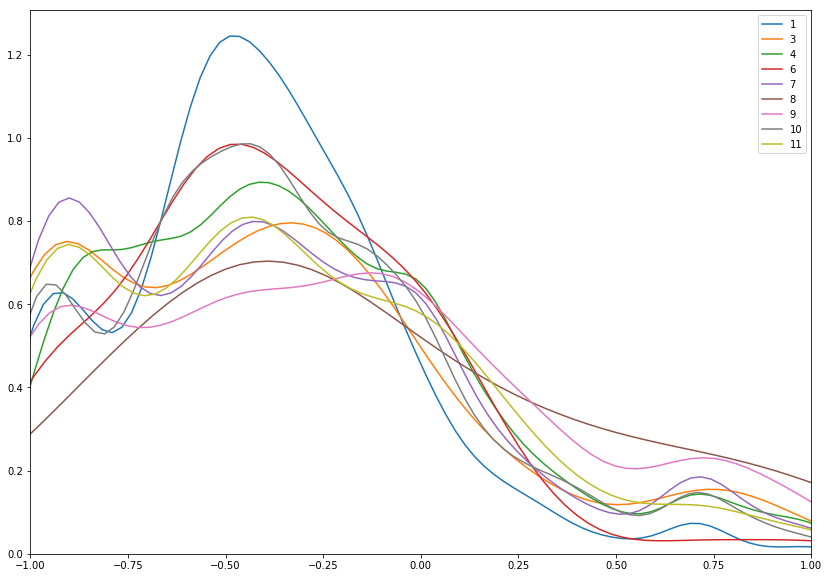

In [24]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (14,10)
df1 = news2[news2["Topic_LSI_Update 12"] == 1]
sns.kdeplot(df1['Sentiment'], label='1')
#df1 = news2[news2["Topic_LSI_Update 12"] == 2]
#sns.kdeplot(df1['Sentiment'], label='2')
df1 = news2[news2["Topic_LSI_Update 12"] == 3]
sns.kdeplot(df1['Sentiment'], label='3')
df1 = news2[news2["Topic_LSI_Update 12"] == 4]
sns.kdeplot(df1['Sentiment'], label='4')
df1 = news2[news2["Topic_LSI_Update 12"] == 5]
sns.kdeplot(df1['Sentiment'], label='5')
df1 = news2[news2["Topic_LSI_Update 12"] == 6]
sns.kdeplot(df1['Sentiment'], label='6')
df1 = news2[news2["Topic_LSI_Update 12"] == 7]
sns.kdeplot(df1['Sentiment'], label='7')
df1 = news2[news2["Topic_LSI_Update 12"] == 8]
sns.kdeplot(df1['Sentiment'], label='8')
df1 = news2[news2["Topic_LSI_Update 12"] == 9]
sns.kdeplot(df1['Sentiment'], label='9')
df1 = news2[news2["Topic_LSI_Update 12"] == 10]
sns.kdeplot(df1['Sentiment'], label='10')
df1 = news2[news2["Topic_LSI_Update 12"] == 11]
sns.kdeplot(df1['Sentiment'], label='11')
df1 = news2[news2["Topic_LSI_Update 12"] == 12]
sns.kdeplot(df1['Sentiment'], label='12')
plt.xlim(-1, 1)